# Assigment 2: Deep Learning

## Generate Dataset

This is the same code from Assignment 1

In [1]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=5, noise=5, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


In [2]:
print(X_test)
print(y_test)

[[ 1.19451626  1.9378714  -0.08073961 -0.49872072  0.60883722]
 [-0.98299165 -1.20894816  0.15989294  0.05443274  2.22336022]
 [ 0.50181025  1.10917458 -0.20735394 -1.73033794 -0.2128659 ]
 [-0.85295128 -0.89097573 -0.2910958  -1.10457461  0.03863521]
 [ 0.05056171  0.69359851 -0.99590893  0.49995133 -0.41830152]
 [-0.9617768   0.15846954 -0.64764453  1.27181862  1.99008302]
 [ 0.51655963 -0.68114843  1.02645497  0.67380149 -1.96601472]
 [-0.38622864 -0.01963622  0.89834902 -0.17271986  0.2426732 ]
 [ 0.09477072 -0.90573928 -1.58530086  0.58184748 -0.29557475]
 [-0.47266282  1.59987751  1.2292134   0.09626794 -0.39941428]
 [ 0.65746416  0.64931448 -0.40039299 -0.03396529  1.37841955]
 [ 0.30059995  0.47166082  1.2005088   0.69509262 -0.77641325]
 [ 0.78660228  0.03592805  0.03754749 -1.84087587 -0.77873992]
 [ 1.91525157 -1.17895602  0.08403339  2.18584815  1.15605606]
 [ 0.42588322 -0.40668098  0.77546788  1.34176007 -0.42305624]
 [ 0.81410087  0.07382213  0.5337351  -0.55337285  0.10

## Visualize Dataset
This is the same code from Assignment 1

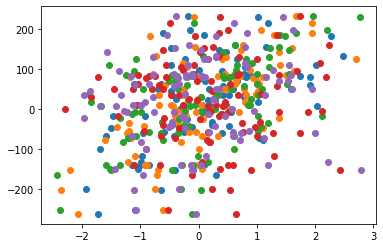

In [3]:
import matplotlib.pyplot as plt

# Your code here
plt.scatter(X[:,0],y)
plt.scatter(X[:,1],y)
plt.scatter(X[:,2],y)
plt.scatter(X[:,3],y)
plt.scatter(X[:,4],y)


X_train = X_train/np.max(X_train)
y_train = y_train /np.max(y_train)
X_test = X_test / np.max(X_test)
y_test = y_test / np.max(y_test)

In [4]:
X_train.shape

(80, 5)

## Model Definition

Using TensorFlow, build a model with the following definition:
> Input of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 1 \\

Use Mean Square Error Loss and Stochaistic Gradient Descent (SGD) Optimizer

Use Gradient Decay with appropriate parameters

In [5]:
import tensorflow as tf
from tensorflow import keras
# Your code here
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(5, input_dim = X_train.shape[1] ,activation='relu'),
  tf.keras.layers.Dense(5, activation='relu'), 
  tf.keras.layers.Dense(1)
])
print(model.summary())
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['mean_squared_error'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________
None


## Plot Loss

Using matplotlib visualise how the loss (both validation and training) is changing, use this information to retrain the model with appropriate parameters.<br>We ideally want the loss to be constant over the last few iterations.

In [6]:
history = model.fit(X_train, y_train , validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
3/3 [==============================] - 3s 79ms/step - loss: 0.2443 - mean_squared_error: 0.2443 - val_loss: 0.2225 - val_mean_squared_error: 0.2225
Epoch 2/100
3/3 [==============================] - 0s 13ms/step - loss: 0.2376 - mean_squared_error: 0.2376 - val_loss: 0.2206 - val_mean_squared_error: 0.2206
Epoch 3/100
3/3 [==============================] - 0s 13ms/step - loss: 0.2317 - mean_squared_error: 0.2317 - val_loss: 0.2188 - val_mean_squared_error: 0.2188
Epoch 4/100
3/3 [==============================] - 0s 12ms/step - loss: 0.2255 - mean_squared_error: 0.2255 - val_loss: 0.2172 - val_mean_squared_error: 0.2172
Epoch 5/100
3/3 [==============================] - 0s 13ms/step - loss: 0.2208 - mean_squared_error: 0.2208 - val_loss: 0.2158 - val_mean_squared_error: 0.2158
Epoch 6/100
3/3 [==============================] - 0s 13ms/step - loss: 0.2163 - mean_squared_error: 0.2163 - val_loss: 0.2141 - val_mean_squared_error: 0.2141
Epoch 7/100
3/3 [=======================

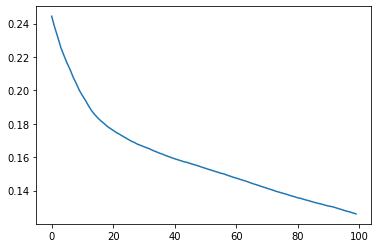

In [7]:
plt.plot(history.history['mean_squared_error'])
plt.show()

## Evaluation Metrics
Use the R2 Score function implemented in the first assignment to evaluate the performance of the model.

In [8]:
# Insert the function for R2 Score
results = model.evaluate(X_test, y_test)
#acc = model.score(X_test , y_test)
print("Accuracy = ", results[1])

1/1 [==============================] - 0s 18ms/step - loss: 0.1348 - mean_squared_error: 0.1348
Accuracy =  0.1347619593143463


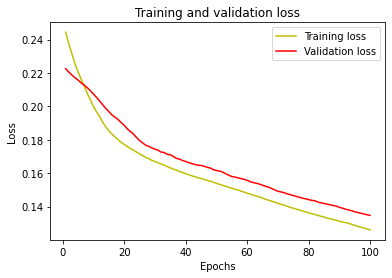

In [9]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Your own custom model
Build a custom model of your own choice.<br>
Describe it in detail in Markdown/Latex in the cell below.<br>
Visualise the loss, as before.

Your text here

In [10]:

# Your code here
import tensorflow as tf
from tensorflow import keras
# Your code here
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(5, input_dim = X_train.shape[1] ,activation='relu'),
  tf.keras.layers.Dense(20, activation='relu'), 
  tf.keras.layers.Dense(30, activation='relu'), 
  tf.keras.layers.Dense(5, activation='relu'), 
  tf.keras.layers.Dense(1)
])
print(model.summary())
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mean_squared_error'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 30        
                                                                 
 dense_4 (Dense)             (None, 20)                120       
                                                                 
 dense_5 (Dense)             (None, 30)                630       
                                                                 
 dense_6 (Dense)             (None, 5)                 155       
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 941
Trainable params: 941
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
history = model.fit(X_train, y_train , validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 78ms/step - loss: 0.2108 - mean_squared_error: 0.2108 - val_loss: 0.2407 - val_mean_squared_error: 0.2407
Epoch 2/100
3/3 [==============================] - 0s 12ms/step - loss: 0.2056 - mean_squared_error: 0.2056 - val_loss: 0.2333 - val_mean_squared_error: 0.2333
Epoch 3/100
3/3 [==============================] - 0s 13ms/step - loss: 0.2010 - mean_squared_error: 0.2010 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 4/100
3/3 [==============================] - 0s 14ms/step - loss: 0.1969 - mean_squared_error: 0.1969 - val_loss: 0.2206 - val_mean_squared_error: 0.2206
Epoch 5/100
3/3 [==============================] - 0s 13ms/step - loss: 0.1923 - mean_squared_error: 0.1923 - val_loss: 0.2131 - val_mean_squared_error: 0.2131
Epoch 6/100
3/3 [==============================] - 0s 14ms/step - loss: 0.1869 - mean_squared_error: 0.1869 - val_loss: 0.2053 - val_mean_squared_error: 0.2053
Epoch 7/100
3/3 [=======================

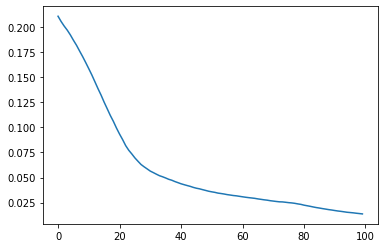

In [12]:
plt.plot(history.history['mean_squared_error'])
plt.show()

In [13]:
results = model.evaluate(X_test, y_test)
#acc = model.score(X_test , y_test)
print("Accuracy = ", results[1])

1/1 [==============================] - 0s 20ms/step - loss: 0.0280 - mean_squared_error: 0.0280
Accuracy =  0.028001945465803146


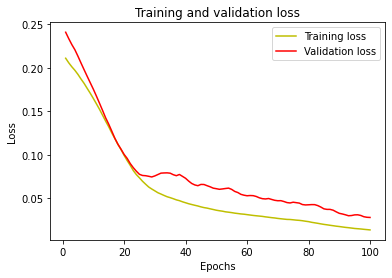

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()